This notebook shows different ways of plotting a type II bubble simulated with JOOMMF:

In [2]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('styles/lato_style.mplstyle')

import oommf_tools as ot
import glob
import re

In [4]:
import scipy.optimize as so
import scipy.interpolate as si

In [34]:
sim_folder = '../sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L800nm_t200nm/'
# sim_folder = 'sims/oommf/isolated_CW_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L800nm_t200nm/'
# sim_folder = 'sims/oommf/FM_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L800nm_t200nm/'


find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)

In [35]:
file_index = 20
_file = file_list[file_index]
print('Bz = {} mT'.format(find_field(file_list[file_index])))
omf_file = ot.OOMMFDataRead(_file)
omf_file.set_coordinates()
omf_file.read_m()

rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))

Bz = 240 mT


In [36]:
np.unique(omf_file.z)[25]

2.0000000000000178

In [37]:
z_index = 0

xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                 omf_file.y == ys[len(ys) // 2]) 

filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                 omf_file.x == xs[len(xs) // 2]) 

# Function interpolation
mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                          omf_file.mz[filter_across_x],
                          kind='cubic')
mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                          omf_file.mz[filter_across_y],
                          kind='cubic')

z =  2.0000000000000178 nm


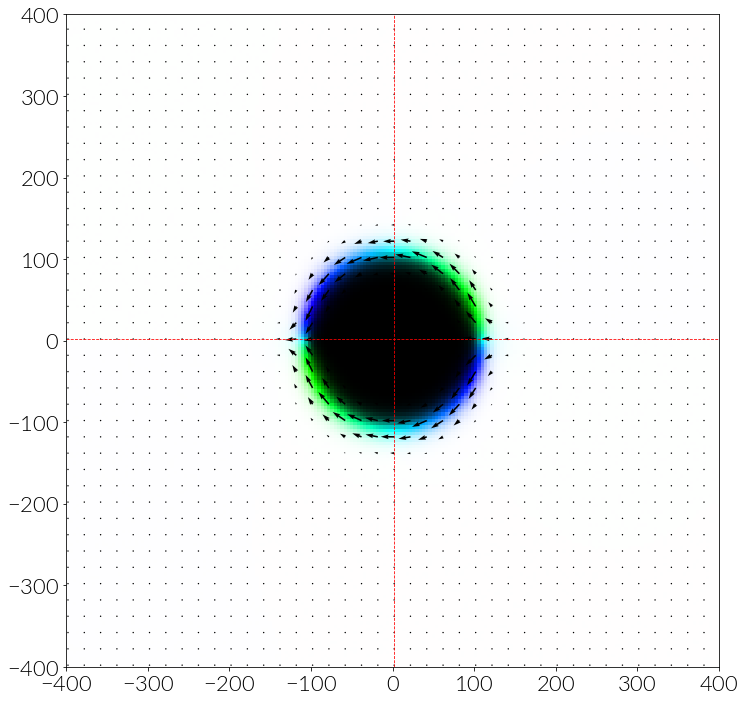

In [38]:
f, ax = plt.subplots(ncols=1, figsize=(12, 12))

z_index = 25
z_filter = omf_file.z == zs[z_index]
print('z = ', np.unique(omf_file.z)[z_index], 'nm')

dx = xs[1] - xs[0]
ax.imshow(rgb_map[z_filter].reshape(len(xs), -1, 3), 
          extent=[(xs.min() - dx * 0.5), (xs.max() + dx * 0.5),
                  (ys.min() - dx * 0.5), (ys.max() + dx * 0.5),
                  ],
          origin='lower'
          )
# plt.scatter(x_oommf, y_oommf, c=rgb_map)

st = 8

# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::5] = 1
arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(len(xs), -1)
arr_fltr[::5] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

plt.quiver(omf_file.x[z_filter][arr_fltr], omf_file.y[z_filter][arr_fltr], 
           omf_file.mx[z_filter][arr_fltr], omf_file.my[z_filter][arr_fltr],
           scale_units='xy', angles='xy', scale=0.05
           )

plt.axvline(x=xs[len(xs) // 2], color='r', ls='--', lw=0.8)
plt.axhline(y=ys[len(ys) // 2], color='r', ls='--', lw=0.8)


# plt.savefig('oommf_bubble_measure.jpg', dpi=300, bbox_inches='tight')

z =  -97.99999999999999 nm


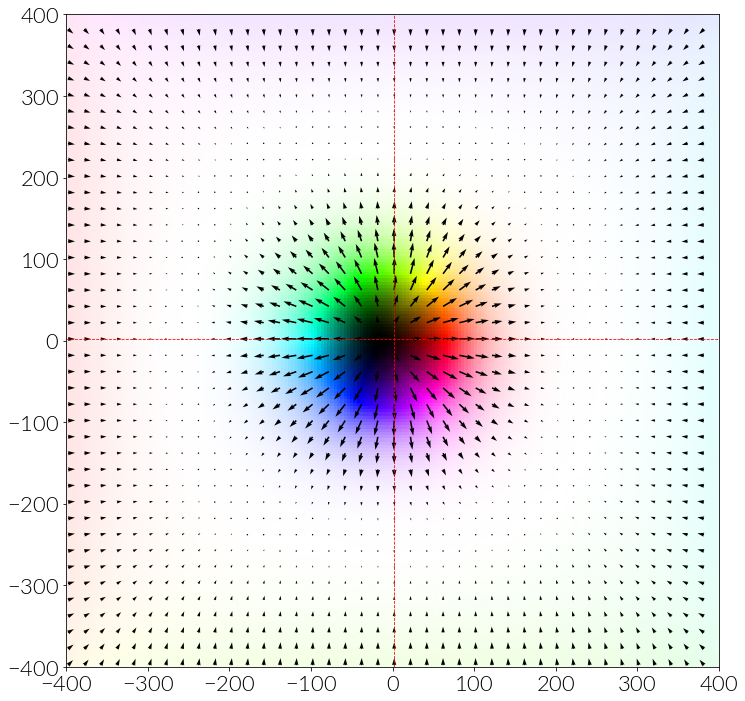

In [12]:
f, ax = plt.subplots(ncols=1, figsize=(12, 12))

z_index = 0
z_filter = omf_file.z == zs[z_index]
print('z = ', np.unique(omf_file.z)[z_index], 'nm')

dx = xs[1] - xs[0]
ax.imshow(rgb_map[z_filter].reshape(len(xs), -1, 3), 
          extent=[(xs.min() - dx * 0.5), (xs.max() + dx * 0.5),
                  (ys.min() - dx * 0.5), (ys.max() + dx * 0.5),
                  ],
          origin='lower'
          )
# plt.scatter(x_oommf, y_oommf, c=rgb_map)

st = 8

# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::5] = 1
arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(len(xs), -1)
arr_fltr[::5] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

plt.quiver(omf_file.x[z_filter][arr_fltr], omf_file.y[z_filter][arr_fltr], 
           omf_file.mx[z_filter][arr_fltr], omf_file.my[z_filter][arr_fltr],
           scale_units='xy', angles='xy', scale=0.05
           )

plt.axvline(x=xs[len(xs) // 2], color='r', ls='--', lw=0.8)
plt.axhline(y=ys[len(ys) // 2], color='r', ls='--', lw=0.8)


# plt.savefig('oommf_bubble_measure.jpg', dpi=300, bbox_inches='tight')

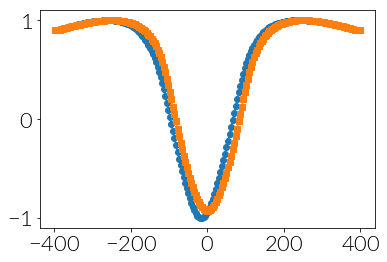

In [13]:
mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                          omf_file.mz[filter_across_x],
                          kind='cubic')
mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                          omf_file.mz[filter_across_y],
                          kind='cubic')


xi = np.linspace(-390, 390, 200)
# plt.plot(xi, mz_across_x(xi), '-C0')

plt.plot(omf_file.x[filter_across_x], omf_file.mz[filter_across_x], 'oC0-')
plt.plot(omf_file.y[filter_across_y], omf_file.mz[filter_across_y], 'sC1-')

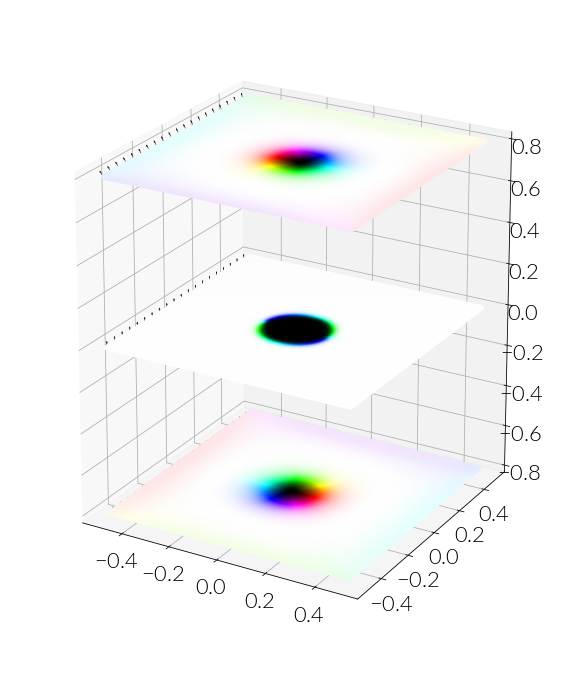

In [39]:
# # Creat mesh.
# X = numpy.arange(-1, 1, 0.1);
# Y = numpy.arange(-1, 1, 0.1);
# X, Y = numpy.meshgrid(X, Y);

# # Create some data to plot.
# A = numpy.copy(X);
# B = numpy.copy(Y);
# C = numpy.sqrt(X**2 + Y**2);
# D = numpy.cos(C);
# # Normalize data for colormap use.
# A -= numpy.min(A); A /= numpy.max(A);
# B -= numpy.min(B); B /= numpy.max(B);
# C -= numpy.min(C); C /= numpy.max(C);
# D -= numpy.min(D); D /= numpy.max(D);

# # Create flat surface.
# Z = numpy.zeros_like(X);

# Plot
f = plt.figure(figsize=(10, 12))
ax = f.add_subplot(111, projection='3d')

# arr_fltr = slice(None, None, 17)
# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::10] = 1
arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(len(xs), -1)
arr_fltr[::10] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

# z_index = 0
# z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
# ax.scatter(omf_file.x[z_filter], omf_file.y[z_filter], -1 * np.ones_like(omf_file.y[z_filter]),
#            c=rgb_map[z_filter])
z_index = 0
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
ax.scatter(omf_file.x[z_filter] / 800, 
           omf_file.y[z_filter] / 800, 
           -0.8 * np.ones_like(omf_file.y[z_filter]),
           c=rgb_map[z_filter])
ax.quiver(omf_file.x[z_filter][arr_fltr] / 800, 
          omf_file.y[z_filter][arr_fltr] / 800,  
          -0.8 * np.ones_like(omf_file.y[z_filter][arr_fltr]),
          #
          omf_file.mx[z_filter][arr_fltr], 
          omf_file.my[z_filter][arr_fltr], 
          # np.zeros_like(omf_file.mz[z_filter][arr_fltr]),
          omf_file.mz[z_filter][arr_fltr],
          # scale_units='xy', angles='xy', scale=0.05,
          color='k', 
          length=0.03, 
          # arrow_length_ratio=0.5, 
          # pivot='middle', 
          linewidth=0.5,
          # normalize=True
          zorder=5
          )


z_index = 25
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
ax.scatter(omf_file.x[z_filter] / 800, 
           omf_file.y[z_filter] / 800, 
           0. * np.ones_like(omf_file.y[z_filter]),
           c=rgb_map[z_filter])
ax.quiver(omf_file.x[z_filter][arr_fltr] / 800, 
          omf_file.y[z_filter][arr_fltr] / 800,  
          0. * np.ones_like(omf_file.y[z_filter][arr_fltr]),
          #
          omf_file.mx[z_filter][arr_fltr], 
          omf_file.my[z_filter][arr_fltr], 
          # np.zeros_like(omf_file.mz[z_filter][arr_fltr]),
          omf_file.mz[z_filter][arr_fltr],
          # scale_units='xy', angles='xy', scale=0.05,
          color='k', 
          length=0.03, 
          # arrow_length_ratio=0.5, 
          # pivot='middle', 
          linewidth=0.5,
          # normalize=True
          zorder=5
          )

z_index = -1
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
ax.scatter(omf_file.x[z_filter] / 800, 
           omf_file.y[z_filter] / 800, 
           0.8 * np.ones_like(omf_file.y[z_filter]),
           c=rgb_map[z_filter])

ax.quiver(omf_file.x[z_filter][arr_fltr] / 800, 
          omf_file.y[z_filter][arr_fltr] / 800,  
          0.8 * np.ones_like(omf_file.y[z_filter][arr_fltr]),
          #
          omf_file.mx[z_filter][arr_fltr], 
          omf_file.my[z_filter][arr_fltr], 
          # np.zeros_like(omf_file.mz[z_filter][arr_fltr]),
          omf_file.mz[z_filter][arr_fltr],
          color='k', 
          length=0.03, 
          # arrow_length_ratio=0.5, 
          # pivot='middle', 
          linewidth=0.5,
          # normalize=True
          )

ax.set_zlim(-0.8, 0.8)

ax.view_init(elev=20)

# plt.savefig('test.jpg', bbox_inches='tight', dpi=400)

# ax.plot_surface(X, Y, Z+0.1, rstride=1, cstride=1, facecolors = cm.coolwarm(B));

In [271]:
omf_file.x[z_filter][arr_fltr] / 800

array([-0.4975, -0.4125, -0.3275, ...,  0.2525,  0.3375,  0.4225])

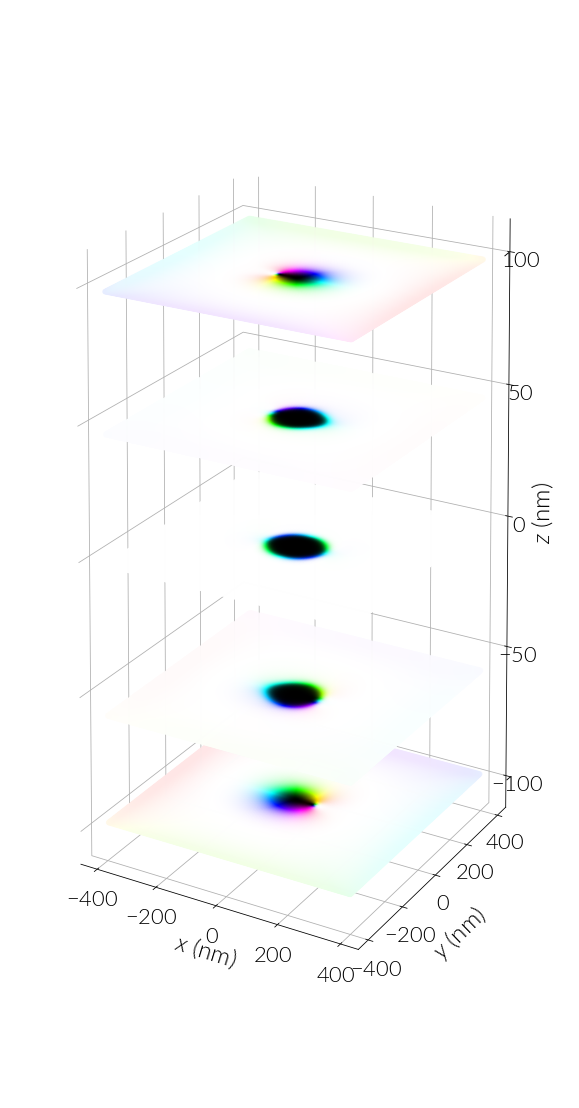

In [337]:
f = plt.figure(figsize=(10, 20))
ax = f.add_subplot(111, projection='3d')
arr_fltr = slice(None, None, 17)

for z_index in [0, 10, 24, 36, -1]:
        
    # z_index = 25
    z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
    ax.scatter(omf_file.x[z_filter], 
               omf_file.y[z_filter], 
               zs[z_index] * np.ones_like(omf_file.y[z_filter]),
               c=rgb_map[z_filter])

    
ax.view_init(elev=12)

ax.set_xlabel(r'$x$ (nm)')
ax.set_ylabel(r'$y$ (nm)')
ax.set_zlabel(r'$z$ (nm)')

ax.axes.yaxis.labelpad = 15
ax.axes.zaxis.labelpad = 15

# make the panes transparent
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# plt.savefig('test.pdf', bbox_inches='tight')
# plt.savefig('isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_Bz260mT_3Dproj.jpg', 
#             bbox_inches='tight', dpi=400)


In [31]:
zscale

NameError: name 'zscale' is not defined

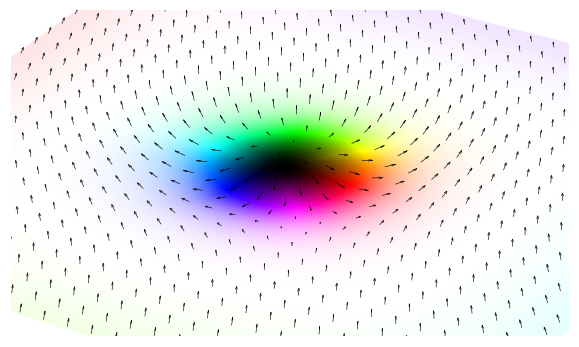

In [46]:
arr_fltr = slice(None, None, 17)
xscale = np.max(xs) - np.min(ys)
# zscale = np.max(zs) - np.min(zs)
zscale = 260

for ii, z_index in enumerate([0, 10, 24, 36, -1]):
# for z_index in [0]:
    
    f = plt.figure(figsize=(10, 6))
    ax = f.add_subplot(111, projection='3d')

    z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
    
    # arr_fltr = slice(None, None, 17)
    # Arrows filter
    arr_fltr_tmp = np.zeros(len(xs))
    arr_fltr_tmp[::7] = 1
    arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(len(xs), -1)
    arr_fltr[::7] = arr_fltr_tmp
    arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)
    
    ax.quiver(omf_file.x[z_filter][arr_fltr] / xscale, 
              omf_file.y[z_filter][arr_fltr] / xscale,  
              # zs[z_index] * np.ones_like(omf_file.y[z_filter][arr_fltr]) / zscale,
              0. * np.ones_like(omf_file.y[z_filter][arr_fltr]),
              #
              omf_file.mx[z_filter][arr_fltr], 
              omf_file.my[z_filter][arr_fltr], 
              omf_file.mz[z_filter][arr_fltr],
              color='k', 
              length=0.015, 
              arrow_length_ratio=0.4, 
              linewidth=0.6,
              # normalize=True,
              zorder=20
              )

    s = ax.scatter(omf_file.x[z_filter] / xscale, 
               omf_file.y[z_filter] / xscale, 
               # zs[z_index] * np.ones_like(omf_file.y[z_filter]) / zscale,
               0. * np.ones_like(omf_file.y[z_filter]),
               c=rgb_map[z_filter],
               alpha=1,
               zorder=0
               )
    # Remove alph shading
    s.set_edgecolors = s.set_facecolors = lambda *args:None
    
    ax.view_init(elev=55)
    # ax.axes.yaxis.labelpad = 15
    # ax.axes.zaxis.labelpad = 15
#     ax.set_xlabel(r'$x$ (nm)')
#     ax.set_ylabel(r'$y$ (nm)')
#     ax.set_zlabel(r'$z$ (nm)')

    ax.set_zlim(-0.1, 0.1)

    # make the panes transparent
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()


    plt.savefig('isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_Bz260mT_3Dproj_{:06d}.png'.format(ii), 
                bbox_inches='tight', dpi=450, transparent=True)
    
# plt.savefig('test2.jpg', bbox_inches='tight', dpi=300)
# plt.savefig('isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_Bz260mT_3Dproj.jpg', 
#             bbox_inches='tight', dpi=400)

In [74]:
for ii, z_index in enumerate([0, 10, 24, 36, -1]):
    print(ii, zs[z_index])

0 -97.99999999999999
1 -57.99999999999999
2 -1.9999999999999782
3 46.00000000000003
4 98.00000000000001


In [48]:
z_filter

array([False, False, False, ..., False, False, False])

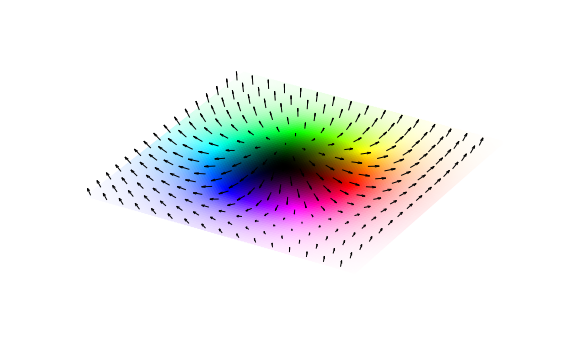

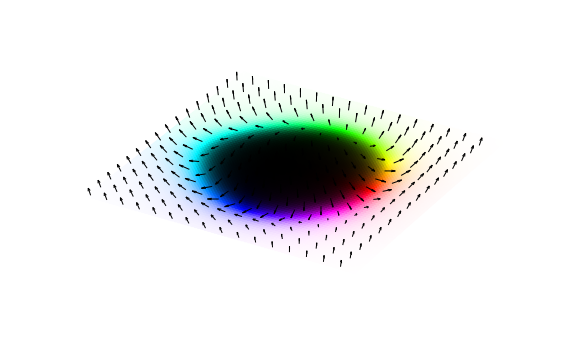

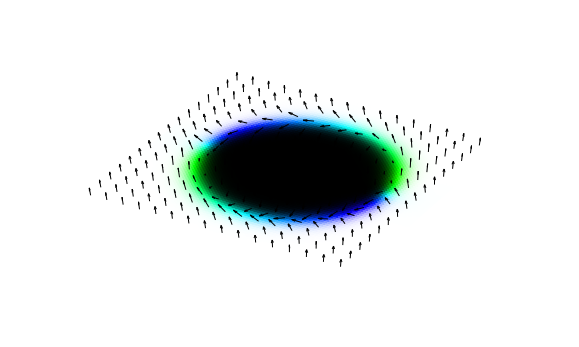

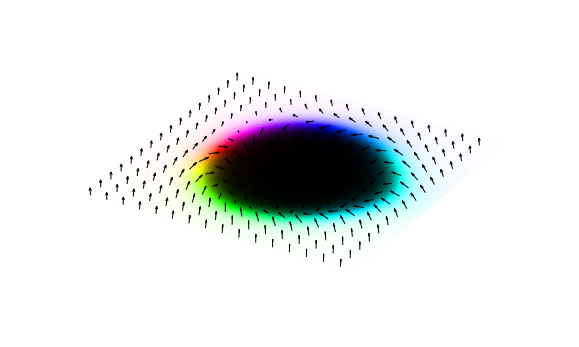

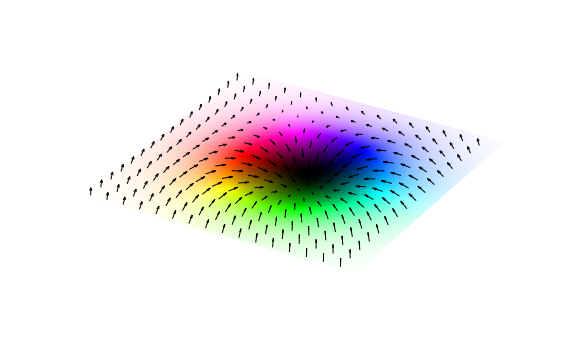

In [65]:
arr_fltr = slice(None, None, 17)
xscale = np.max(xs) - np.min(xs)
# zscale = np.max(zs) - np.min(zs)
zscale = 260

for ii, z_index in enumerate([0, 10, 24, 36, -1]):
# for z_index in [0]:
    
    f = plt.figure(figsize=(10, 6))
    ax = f.add_subplot(111, projection='3d')

    # Filter restricting mesh sites in a z-layer and in a range of x and y limits
    z_filter = np.logical_and(omf_file.z == np.unique(omf_file.z)[z_index],
                              np.abs(omf_file.x) < 160)
    z_filter = np.logical_and(z_filter, np.abs(omf_file.y) < 160)
    
    # The numer of mesh sites in the x direction after filtering data
    nx = int(np.sqrt(len(omf_file.x[z_filter])))
    
    # arr_fltr = slice(None, None, 17)
    # Arrows filter
    arr_fltr_tmp = np.zeros(nx)
    arr_fltr_tmp[::5] = 1
    arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(nx, -1)
    arr_fltr[::5] = arr_fltr_tmp
    arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)
    
    ax.quiver(omf_file.x[z_filter][arr_fltr] / xscale, 
              omf_file.y[z_filter][arr_fltr] / xscale,  
              # zs[z_index] * np.ones_like(omf_file.y[z_filter][arr_fltr]) / zscale,
              0. * np.ones_like(omf_file.y[z_filter][arr_fltr]),
              #
              omf_file.mx[z_filter][arr_fltr], 
              omf_file.my[z_filter][arr_fltr], 
              omf_file.mz[z_filter][arr_fltr],
              color='k', 
              length=0.015, 
              arrow_length_ratio=0.4, 
              linewidth=1,
              # normalize=True,
              zorder=20
              )

    s = ax.scatter(omf_file.x[z_filter] / xscale, 
               omf_file.y[z_filter] / xscale, 
               # zs[z_index] * np.ones_like(omf_file.y[z_filter]) / zscale,
               0. * np.ones_like(omf_file.y[z_filter]),
               c=rgb_map[z_filter],
               alpha=1,
               zorder=0
               )
    # Remove alph shading
    s.set_edgecolors = s.set_facecolors = lambda *args:None
    
    ax.view_init(elev=55)
    # ax.axes.yaxis.labelpad = 15
    # ax.axes.zaxis.labelpad = 15
#     ax.set_xlabel(r'$x$ (nm)')
#     ax.set_ylabel(r'$y$ (nm)')
#     ax.set_zlabel(r'$z$ (nm)')

    ax.set_zlim(-0.1, 0.1)

    # make the panes transparent
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()

    
    ax.set_xlim([-0.2, 0.2])
    ax.set_ylim([-0.2, 0.2])

    plt.savefig('isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_Bz260mT_3Dproj_ZOOM_{:06d}.png'.format(ii), 
                bbox_inches='tight', dpi=450, transparent=True)
    
# plt.savefig('test2.jpg', bbox_inches='tight', dpi=300)
# plt.savefig('isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_Bz260mT_3Dproj.jpg', 
#             bbox_inches='tight', dpi=400)

In [62]:
omf_file.y[z_filter].min()

-177.99999999999997

# Plot 3D

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(0.0, 0.8)

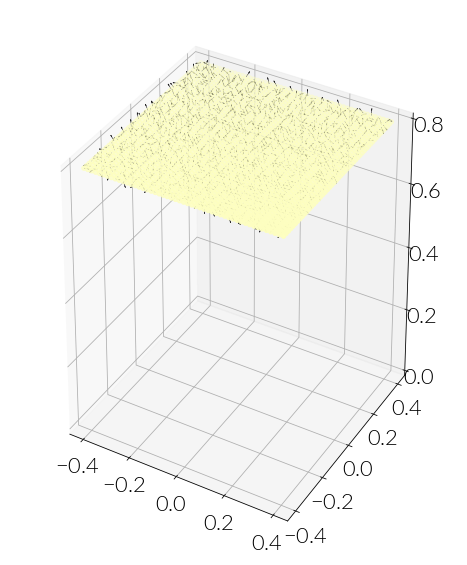

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot
f = plt.figure(figsize=(8, 10))
ax = f.add_subplot(111, projection='3d')
arr_fltr = slice(None, None, 17)

x = np.tile(np.linspace(-0.4, 0.4, 50), 50)
y = np.repeat(np.linspace(-0.4, 0.4, 50), 50)

np.random.seed = 1
vx = 2 * np.random.random(len(x)) - 1
vy = 2 * np.random.random(len(x)) - 1
vz = 2 * np.random.random(len(x)) - 1
norm = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
vx, vy, vz = vx / norm, vy / norm, vz / norm

ax.scatter(x, y, 0.8 * np.ones_like(x),
           c=np.zeros_like(vz), cmap='RdYlBu', vmin=-1, vmax=1)
ax.quiver(x[::2], y[::2],  .8 * np.ones_like(x[::2]),
          vx[::2], vy[::2], vz[::2],
          color='k', 
          length=0.02,  
          linewidth=0.5)

# ax.scatter(x, y, 0.0 * np.ones_like(x),
#            c=np.zeros_like(vz), cmap='RdYlBu', vmin=-1, vmax=1)
# ax.quiver(x[::2], y[::2], 0.0 * np.ones_like(x[::2]),
#           vx[::2], vy[::2], vz[::2],
#           color='k', 
#           length=0.02,  
#           linewidth=0.5,
#           # zorder=1000
#           )

ax.set_zlim(0., 0.8)

# # plt.savefig('test.pdf', bbox_inches='tight')
# plt.savefig('test.jpg', bbox_inches='tight', dpi=400)

# ax.plot_surface(X, Y, Z+0.1, rstride=1, cstride=1, facecolors = cm.coolwarm(B));

In [413]:
norm

50.03389186996542

# Plotly

In [34]:

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/vortex.csv")

arr_fltr = slice(None, None, 17)

xscale = np.max(xs) - np.min(ys)
# zscale = np.max(zs) - np.min(zs)
zscale = 260
       
z_index = 0
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]

data = go.Cone(
    x=omf_file.x[z_filter][arr_fltr] / xscale,
    y=omf_file.y[z_filter][arr_fltr] / xscale,
    z=zs[z_index] * np.ones_like(omf_file.y[z_filter][arr_fltr]) / zscale,
    u=omf_file.mx[z_filter][arr_fltr], 
    v=omf_file.my[z_filter][arr_fltr], 
    w=omf_file.mz[z_filter][arr_fltr],
    # "colors": np.ones((len(omf_file.mz[z_filter][arr_fltr]), 3)),
    # "colorscale": 'Blues',
    sizemode="absolute",
    sizeref=0.5
)

z_index = 25
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
data2 = go.Cone(
    x=omf_file.x[z_filter][arr_fltr] / xscale,
    y=omf_file.y[z_filter][arr_fltr] / xscale,
    z=zs[z_index] * np.ones_like(omf_file.y[z_filter][arr_fltr]) / zscale,
    u=omf_file.mx[z_filter][arr_fltr], 
    v=omf_file.my[z_filter][arr_fltr], 
    w=omf_file.mz[z_filter][arr_fltr],
    # "colors": np.ones((len(omf_file.mz[z_filter][arr_fltr]), 3)),
    # "colorscale": 'Blues',
    sizemode="absolute",
    sizeref=0.4
)

layout = {
    "scene": {
        "xaxis": dict(nticks=4, range = [-1,1]),
        "yaxis": dict(nticks=4, range = [-1,1]),
        "zaxis": dict(nticks=4, range = [-1,1]),
        "domain": {"x": [0, 1]},
        "aspectratio": {"x": 1, "y": 1, "z": 1},
        "camera": {
            "eye": {"x": 1.2, "y": 1.2, "z": 0.6}
        }
    }
}

fig = go.Figure(data=[data, data2], layout=layout)
py.offline.iplot(fig, filename="bubble_example")

In [10]:

py.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})